In [1]:
#Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize, OneHotEncoder, StandardScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay, f1_score, plot_roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import pickle
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import svm

## Data Understanding

In [2]:
df = pd.read_csv('../data/students_mental_health_survey.csv')

In [3]:
df.head()

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,1,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          7022 non-null   int64  
 1   Course                       7022 non-null   object 
 2   Gender                       7022 non-null   object 
 3   CGPA                         7010 non-null   float64
 4   Stress_Level                 7022 non-null   int64  
 5   Depression_Score             7022 non-null   int64  
 6   Anxiety_Score                7022 non-null   int64  
 7   Sleep_Quality                7022 non-null   object 
 8   Physical_Activity            7022 non-null   object 
 9   Diet_Quality                 7022 non-null   object 
 10  Social_Support               7022 non-null   object 
 11  Relationship_Status          7022 non-null   object 
 12  Substance_Use                7007 non-null   object 
 13  Counseling_Service

In [5]:
df.describe()

,Age,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Financial_Stress,Semester_Credit_Load
count,7022.000000,7010.00000,7022.000000,7022.000000,7022.000000,7022.000000,7022.000000
mean,23.003418,3.49127,2.427941,2.254486,2.300484,2.453005,22.010538
std,3.853978,0.28742,1.638408,1.625193,1.624305,1.708995,4.358380
min,18.000000,2.44000,0.000000,0.000000,0.000000,0.000000,15.000000
25%,20.000000,3.29000,1.000000,1.000000,1.000000,1.000000,18.000000
50%,22.000000,3.50000,2.000000,2.000000,2.000000,2.000000,22.000000
75%,25.000000,3.70000,4.000000,3.000000,4.000000,4.000000,26.000000
max,35.000000,4.00000,5.000000,5.000000,5.000000,5.000000,29.000000


In [6]:
# There are a total of 27 rows with null values so decided to drop all 27 rows. 
df.dropna(inplace=True)

In [7]:
df.reset_index(inplace=True, drop=True)

In [8]:
df

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus
4,21,Medical,Female,3.35,2,4,3,Good,Moderate,Good,High,Single,Never,Never,No,No,5,Moderate,19,Off-Campus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990,20,Law,Female,3.33,1,1,1,Average,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,3,Moderate,29,Off-Campus
6991,20,Law,Female,3.69,3,1,5,Good,Low,Poor,High,Single,Never,Frequently,Yes,No,1,High,26,Off-Campus
6992,24,Medical,Female,3.73,3,4,1,Good,Moderate,Average,High,Single,Never,Occasionally,No,No,3,Low,15,Off-Campus
6993,26,Others,Male,3.65,4,5,1,Good,High,Poor,Moderate,Married,Never,Occasionally,No,Yes,4,Moderate,17,Off-Campus


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6995 entries, 0 to 6994
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          6995 non-null   int64  
 1   Course                       6995 non-null   object 
 2   Gender                       6995 non-null   object 
 3   CGPA                         6995 non-null   float64
 4   Stress_Level                 6995 non-null   int64  
 5   Depression_Score             6995 non-null   int64  
 6   Anxiety_Score                6995 non-null   int64  
 7   Sleep_Quality                6995 non-null   object 
 8   Physical_Activity            6995 non-null   object 
 9   Diet_Quality                 6995 non-null   object 
 10  Social_Support               6995 non-null   object 
 11  Relationship_Status          6995 non-null   object 
 12  Substance_Use                6995 non-null   object 
 13  Counseling_Service

In [10]:
df['Sleep_Quality'].value_counts()

Good       3579
Average    2721
Poor        695
Name: Sleep_Quality, dtype: int64

In [11]:
df['Physical_Activity'].value_counts()

Moderate    3505
Low         2085
High        1405
Name: Physical_Activity, dtype: int64

In [12]:
df['Diet_Quality'].value_counts()

Average    4253
Good       1379
Poor       1363
Name: Diet_Quality, dtype: int64

In [13]:
df['Social_Support'].value_counts()

Moderate    3457
High        2165
Low         1373
Name: Social_Support, dtype: int64

In [14]:
df['Relationship_Status'].value_counts()

Single               3562
In a Relationship    2069
Married              1364
Name: Relationship_Status, dtype: int64

In [15]:
df['Substance_Use'].value_counts()

Never           5894
Occasionally     697
Frequently       404
Name: Substance_Use, dtype: int64

In [16]:
df['Counseling_Service_Use'].value_counts()

Never           4250
Occasionally    2069
Frequently       676
Name: Counseling_Service_Use, dtype: int64

In [17]:
df['Family_History'].value_counts()

No     4844
Yes    2151
Name: Family_History, dtype: int64

In [18]:
df['Chronic_Illness'].value_counts()

No     6652
Yes     343
Name: Chronic_Illness, dtype: int64

In [19]:
df['Financial_Stress'].value_counts()

0    1225
1    1181
2    1168
4    1156
3    1152
5    1113
Name: Financial_Stress, dtype: int64

In [20]:
df['Extracurricular_Involvement'].value_counts()

Moderate    3426
Low         2157
High        1412
Name: Extracurricular_Involvement, dtype: int64

In [21]:
df['Semester_Credit_Load'].value_counts()

27    511
17    506
28    490
15    471
18    467
19    466
16    465
24    463
29    460
25    458
26    455
22    455
23    446
21    443
20    439
Name: Semester_Credit_Load, dtype: int64

In [22]:
df['Age'].value_counts()

21    776
18    735
20    721
19    708
22    690
23    637
24    537
26    454
25    454
27    323
28    257
29    188
30    162
31    124
32     98
33     55
34     45
35     31
Name: Age, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6995 entries, 0 to 6994
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          6995 non-null   int64  
 1   Course                       6995 non-null   object 
 2   Gender                       6995 non-null   object 
 3   CGPA                         6995 non-null   float64
 4   Stress_Level                 6995 non-null   int64  
 5   Depression_Score             6995 non-null   int64  
 6   Anxiety_Score                6995 non-null   int64  
 7   Sleep_Quality                6995 non-null   object 
 8   Physical_Activity            6995 non-null   object 
 9   Diet_Quality                 6995 non-null   object 
 10  Social_Support               6995 non-null   object 
 11  Relationship_Status          6995 non-null   object 
 12  Substance_Use                6995 non-null   object 
 13  Counseling_Service

In [24]:
df['Financial_Stress'].value_counts()

0    1225
1    1181
2    1168
4    1156
3    1152
5    1113
Name: Financial_Stress, dtype: int64

In [25]:
df['Depression_Score'].value_counts()

3    1385
1    1303
2    1300
0    1288
4     878
5     841
Name: Depression_Score, dtype: int64

In [26]:
df.shape

(6995, 20)

## Data Preparation

### Preprocessing Data

In [27]:
# Defining columns for scaling, one hot encoding, and ordinal encoding
continuous_cols = ['Age', 'Semester_Credit_Load', 'CGPA']
ohe_cols = ['Course', 'Gender', 'Relationship_Status', 'Family_History', 'Residence_Type', 'Chronic_Illness']
ordinal_cols = ['Sleep_Quality', 'Physical_Activity', 'Diet_Quality', 'Social_Support', 'Substance_Use', 
               'Counseling_Service_Use', 'Extracurricular_Involvement']

# Ordering Ordinal Column Entries
sleep_ord = ['Poor', 'Average', 'Good']
phys_ord = ['Low', 'Moderate', 'High']
diet_ord = ['Poor', 'Average', 'Good']
social_ord = ['Low', 'Moderate', 'High']
subst_ord = ['Never', 'Occasionally', 'Frequently']
counsel_ord = ['Never', 'Occasionally', 'Frequently']
extracurric_ord = ['Low', 'Moderate', 'High']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(remainder='passthrough',
    transformers=[
        ('num', StandardScaler(), continuous_cols),  
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe_cols),
        ('ord', OrdinalEncoder(categories=[sleep_ord, phys_ord, diet_ord, 
                                           social_ord, subst_ord, counsel_ord, extracurric_ord]), 
         ordinal_cols)])

In [28]:
df.loc[df['Depression_Score'] >= 3, 'Depression_Binary'] = 'Yes'
df.loc[df['Depression_Score'] < 3, 'Depression_Binary'] = 'No'
df.drop('Depression_Score', axis=1, inplace=True)

### Train_Test_Split

In [29]:
y = df.pop('Depression_Binary')
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=333)

In [30]:
X_train

,Age,Course,Gender,CGPA,Stress_Level,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
4575,21,Engineering,Female,3.08,0,3,Good,Low,Good,High,Married,Never,Never,Yes,No,1,High,17,With Family
109,23,Engineering,Female,3.10,0,0,Good,High,Good,High,Married,Never,Never,No,No,0,Moderate,16,On-Campus
302,22,Business,Female,3.65,2,2,Good,Moderate,Poor,Moderate,Single,Never,Never,No,No,4,Moderate,20,Off-Campus
4528,24,Engineering,Male,3.44,5,3,Average,Moderate,Average,Low,In a Relationship,Never,Never,No,No,5,Moderate,29,Off-Campus
4380,26,Law,Male,3.36,1,0,Poor,Moderate,Average,Moderate,Single,Never,Never,Yes,No,0,Low,28,On-Campus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5494,22,Medical,Female,3.07,1,5,Average,Low,Average,High,Single,Never,Never,No,No,5,Moderate,19,With Family
6067,25,Business,Female,3.63,1,3,Good,Low,Average,Low,Single,Never,Never,Yes,No,1,Moderate,16,Off-Campus
1443,25,Law,Male,3.25,2,5,Good,Low,Average,Moderate,Single,Never,Occasionally,Yes,Yes,5,Low,17,On-Campus
973,23,Engineering,Female,3.73,2,3,Average,Moderate,Poor,Low,Married,Never,Never,Yes,No,4,Low,22,With Family


In [31]:
y_train.value_counts()

No     2940
Yes    2306
Name: Depression_Binary, dtype: int64

## Modeling

## Evaluation

In [32]:
# Defining scorers to evaluate models
recall_scorer = make_scorer(recall_score, pos_label='Yes')
f1_scorer = make_scorer(f1_score, pos_label='Yes')

In [33]:
def initial_scores(model):
       
    # Defining the predictions from the Pipeline using the training data
    y_pred = model.predict(X_train)
    
    # Evaluating the accuracy score on the training data
    print('Train Recall: ', recall_score(y_train, y_pred, pos_label='Yes'))
#     print('Train F1: ', f1_score(y_train, y_pred, pos_label='Yes'))
    print('Train Accuracy: ', accuracy_score(y_train, y_pred))
    
    # Creating confusion matrix
    cf = confusion_matrix(y_train, y_pred)
    # Displaying confusion matrix
    ConfusionMatrixDisplay(cf, display_labels=['No', 'Yes']).plot()

In [34]:
def cv_scores(model):
        
    # Defining the predictions from the Pipeline using the training data
    y_pred = model.predict(X_train)
    
    # Evaluating the scores 
    print('Train Recall: ', recall_score(y_train, y_pred, pos_label='Yes'))
    print('CV Recall: ', cross_val_score(model, X_train, y_train, scoring=recall_scorer, n_jobs=3).mean())

#     print('')
#     print('Train F1: ', f1_score(y_train, y_pred, pos_label='Yes'))
#     print('CV F1: ', cross_val_score(model, X_train, y_train, scoring=f1_scorer).mean())
   
    print('')
    print('Train Accuracy: ', accuracy_score(y_train, y_pred))
    print('CV Accuracy: ', cross_val_score(model, X_train, y_train, n_jobs=3).mean())
    
    
    # Creating confusion matrix
    cf = confusion_matrix(y_train, y_pred)
    # Displaying confusion matrix
    ConfusionMatrixDisplay(cf, display_labels=['No', 'Yes']).plot()

In [35]:
def grid_results(model):
    print("Recall")
    print(model)
#     print(model.best_score_)
    print('')
    
    # Defining the predictions from the Pipeline using the training data
    y_pred = model.predict(X_train)
    
    # Evaluating the scores 
    print('Best Estimator Scores:')
    print('Train Recall: ', recall_score(y_train, y_pred, pos_label='Yes'))
    print('CV Recall: ', cross_val_score(model, X_train, y_train, scoring=recall_scorer, n_jobs=3).mean())
    
#     print('')
#     print('Train F1: ', f1_score(y_train, y_pred, pos_label='Yes'))
#     print('CV F1: ', cross_val_score(model, X_train, y_train, scoring=f1_scorer).mean())
    
    print('')
    print('Train Accuracy: ', accuracy_score(y_train, y_pred))
    print('CV Accuracy: ', cross_val_score(model, X_train, y_train, n_jobs=3).mean())
   
    print('')
    print('Best Estimator Confusion Matrix on Training Data with no CV')
    # Creating confusion matrix
    cf = confusion_matrix(y_train, y_pred)
    # Displaying confusion matrix
    ConfusionMatrixDisplay(cf, display_labels=['No', 'Yes']).plot()

### Dummy Model Classifier

In [36]:
# # Instantiate dummy model that will always predict Yes
# dummy_model = DummyClassifier(strategy="constant", constant='Yes')
# dummy_model.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/dummy_model.pkl', 'wb') as f:
#     pickle.dump(dummy_model, f)

In [37]:
# Load the pickled model
with open('../pickled_models/dummy_model.pkl', 'rb') as f:
    dummy_model = pickle.load(f)

Train Recall:  1.0
CV Recall:  1.0

Train Accuracy:  0.4395730080060999
CV Accuracy:  0.43957292659675884


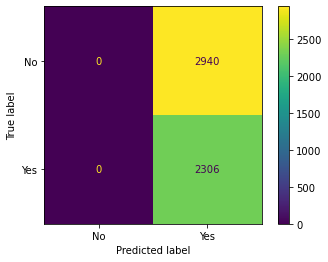

In [38]:
# Cross Validation Scores
cv_scores(dummy_model)

### First Model: Decision Tree 

In [39]:
# # Creating steps for a Pipeline 
# tree_steps = [('preprocess', preprocessor),
#               ('tree', DecisionTreeClassifier())]

# # Feeding the Pipeline the steps defined above
# tree_pipe = Pipeline(tree_steps)

# # Fitting the training data to the Pipeline
# tree_pipe.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/tree_pipe.pkl', 'wb') as f:
#     pickle.dump(tree_pipe, f)

In [40]:
# Load the pickled model
with open('../pickled_models/tree_pipe.pkl', 'rb') as f:
    tree_pipe = pickle.load(f)

Train Recall:  1.0
CV Recall:  0.46356781324243357

Train Accuracy:  1.0
CV Accuracy:  0.5198278632711426


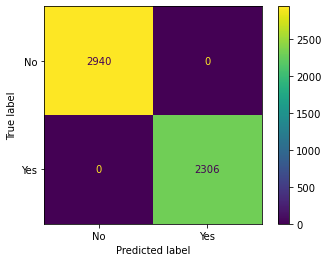

In [41]:
# Cross Validation Scores
cv_scores(tree_pipe)

### Second Model: Random Forest

In [42]:
# # Creating steps for a Pipeline 
# forest_steps = [('preprocess', preprocessor),
#                 ('forest', RandomForestClassifier(random_state=333))]

# # Feeding the Pipeline the steps defined above
# forest_pipe = Pipeline(forest_steps)

# # Fitting the training data to the Pipeline
# forest_pipe.fit(X_train, y_train)

# # # Pickle the model
# with open('../pickled_models/forest_pipe.pkl', 'wb') as f:
#     pickle.dump(forest_pipe, f)

In [43]:
# Load the pickled model
with open('../pickled_models/forest_pipe.pkl', 'rb') as f:
    forest_pipe = pickle.load(f)

Train Recall:  1.0
CV Recall:  0.30399188663830745

Train Accuracy:  1.0
CV Accuracy:  0.5947385718825184


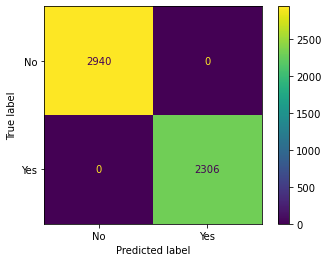

In [44]:
cv_scores(forest_pipe)

#### Random Forest with GridSearch 1

In [45]:
# # Creating parameters for GridSearch
# params = {'forest__n_estimators': [50, 100, 150],
#           'forest__criterion': ['gini', 'entropy'],
#           'forest__max_depth': [10, None],
#           'forest__min_samples_split': [2],
#           'forest__min_weight_fraction_leaf': [0, .5],
#           'forest__max_features': ['auto', None, 15],
#           'forest__max_leaf_nodes': [None, 10],
#           'forest__min_impurity_decrease': [0, .5],
#          }

# # GridSearch with the random forest pipeline, parameters above, 5 fold cross validation, and accuracy score
# forest_grid1 = GridSearchCV(estimator=forest_pipe, param_grid=params, cv=5, scoring=recall_scorer, n_jobs=3)

# # Fitting the GridSearch
# forest_grid1.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/forest_grid1_best.pkl', 'wb') as f:
#     pickle.dump(forest_grid1.best_estimator_, f)

In [46]:
# Load the pickled model
with open('../pickled_models/forest_grid1_best.pkl', 'rb') as f:
    forest_grid1_best = pickle.load(f)

Recall
Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Semester_Credit_Load',
                                                   'CGPA']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Course', 'Gender',
                                                   'Relationship_Status',
                                                   'Family_History',
                                                   'Residence_Type',
                                                   'Chronic_Illness']),
                                                 ('ord',
                                                  OrdinalEncoder(categorie

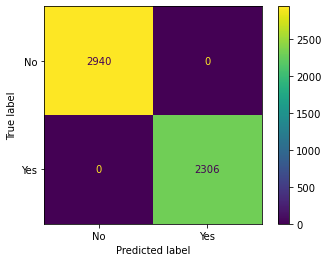

In [47]:
grid_results(forest_grid1_best)

#### Random Forest with GridSearch 2

In [48]:
# # Creating parameters for GridSearch
# params = {'forest__n_estimators': [50, 100, 40, 60],
#           'forest__criterion': ['gini'],
#           'forest__max_depth': [30, 100, None],
#           'forest__min_samples_split': [3, 2],
#           'forest__min_weight_fraction_leaf': [0, .75, .5, .25],
#           'forest__max_features': [15, 20, 10, 'auto'],
#           'forest__max_leaf_nodes': [None, 20],
#           'forest__min_impurity_decrease': [0, .25],
#          }

# # GridSearch with the random forest pipeline, parameters above, 5 fold cross validation, and accuracy score
# forest_grid2 = GridSearchCV(estimator=forest_pipe, param_grid=params, cv=5, scoring=recall_scorer, n_jobs=3)

# # Fitting the GridSearch
# forest_grid2.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/forest_grid2_best.pkl', 'wb') as f:
#     pickle.dump(forest_grid2.best_estimator_, f)

In [49]:
# Load the pickled model
with open('../pickled_models/forest_grid2_best.pkl', 'rb') as f:
    forest_grid2_best = pickle.load(f)

Recall
Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Semester_Credit_Load',
                                                   'CGPA']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Course', 'Gender',
                                                   'Relationship_Status',
                                                   'Family_History',
                                                   'Residence_Type',
                                                   'Chronic_Illness']),
                                                 ('ord',
                                                  OrdinalEncoder(categorie

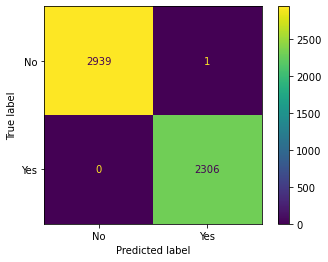

In [50]:
grid_results(forest_grid2_best)

#### Random Forest with Grid Search 3

In [51]:
# # Creating parameters for GridSearch
# params = {'forest__n_estimators': [40],
#           'forest__criterion': ['gini'],
#           'forest__max_depth': [30, 60],
#           'forest__min_samples_split': [3, 4],
#           'forest__min_weight_fraction_leaf': [0],
#           'forest__max_features': [15, None],
#           'forest__max_leaf_nodes': [100, 500, None, 300, 1000],
#           'forest__min_impurity_decrease': [0],
#          }

# # GridSearch with the random forest pipeline, parameters above, 5 fold cross validation, and accuracy score
# forest_grid3 = GridSearchCV(estimator=forest_pipe, param_grid=params, cv=5, scoring=recall_scorer, n_jobs=3)

# # Fitting the GridSearch
# forest_grid3.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/forest_grid3_best.pkl', 'wb') as f:
#     pickle.dump(forest_grid3.best_estimator_, f)

In [52]:
# Load the pickled model
with open('../pickled_models/forest_grid3_best.pkl', 'rb') as f:
    forest_grid3_best = pickle.load(f)

Recall
Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Semester_Credit_Load',
                                                   'CGPA']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Course', 'Gender',
                                                   'Relationship_Status',
                                                   'Family_History',
                                                   'Residence_Type',
                                                   'Chronic_Illness']),
                                                 ('ord',
                                                  OrdinalEncoder(categorie

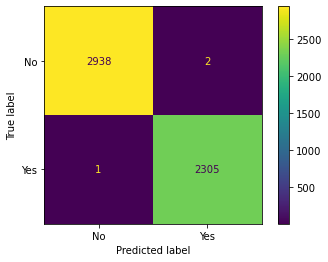

In [53]:
grid_results(forest_grid3_best)

### Third Model: Logistic Regression

In [54]:
# # Creating steps for a Pipeline 
# logreg_steps = [('preprocess', preprocessor),
#                 ('logreg', LogisticRegression(random_state=333))]

# # Feeding the Pipeline the steps defined above
# logreg_pipe = Pipeline(logreg_steps)

# # Fitting the training data to the Pipeline
# logreg_pipe.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/logreg_pipe.pkl', 'wb') as f:
#     pickle.dump(logreg_pipe, f)

In [55]:
# Load the pickled model
with open('../pickled_models/logreg_pipe.pkl', 'rb') as f:
    logreg_pipe = pickle.load(f)

Train Recall:  0.2341717259323504
CV Recall:  0.23460855846972986

Train Accuracy:  0.6212352268394967
CV Accuracy:  0.6210449861546145


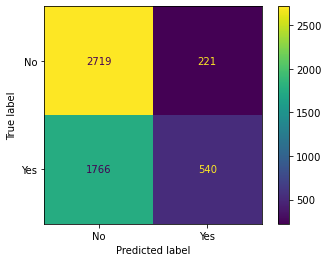

In [56]:
cv_scores(logreg_pipe)

#### Logistic Regression with GridSearch 1

In [57]:
# Creating parameters for GridSearch
params = {'logreg__class_weight':['balanced', None],
                'logreg__C': [1, 0.0001],
                'logreg__solver': ['lbfgs', 'sag', 'saga'],
                'logreg__max_iter': [100],
                'logreg__penalty': ['l1', 'l2']}

# GridSearch with the logistic regression pipeline, parameters above, 5 fold cross validation, and accuracy score
logreg_grid1 = GridSearchCV(estimator=logreg_pipe, param_grid=params, cv=5, scoring=recall_scorer, n_jobs=3)

# Fitting the GridSearch
logreg_grid1.fit(X_train, y_train)

# Pickle the model
with open('../pickled_models/logreg_grid1_best.pkl', 'wb') as f:
    pickle.dump(logreg_grid1.best_estimator_, f)

In [58]:
# Load the pickled model
with open('../pickled_models/logreg_grid1_best.pkl', 'rb') as f:
    logreg_grid1_best = pickle.load(f)

Recall
Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Semester_Credit_Load',
                                                   'CGPA']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Course', 'Gender',
                                                   'Relationship_Status',
                                                   'Family_History',
                                                   'Residence_Type',
                                                   'Chronic_Illness']),
                                                 ('ord',
                                                  OrdinalEncoder(categorie

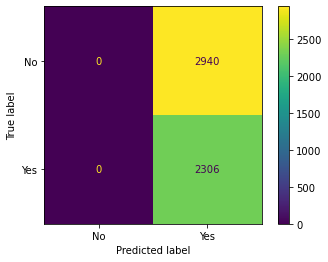

In [59]:
grid_results(logreg_grid1_best)

#### Logistic Regression with GridSearch 2

In [60]:
# # Creating parameters for GridSearch
# params = {'logreg__class_weight':['balanced'],
#                 'logreg__C': [.0001, .00001, .001],
#                 'logreg__solver': ['saga', 'liblinear', 'newton-cg'],
#                 'logreg__max_iter': [50, 100, 150, 1000],
#                 'logreg__penalty': ['elasticnet', 'l1', None]}

# # GridSearch with the logistic regression pipeline, parameters above, 5 fold cross validation, and accuracy score
# logreg_grid2 = GridSearchCV(estimator=logreg_pipe, param_grid=params, cv=5, scoring=recall_scorer, n_jobs=3)

# # Fitting the GridSearch
# logreg_grid2.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/logreg_grid2_best.pkl', 'wb') as f:
#     pickle.dump(logreg_grid2.best_estimator_, f)

In [61]:
# Load the pickled model
with open('../pickled_models/logreg_grid2_best.pkl', 'rb') as f:
    logreg_grid2_best = pickle.load(f)

Recall
Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Semester_Credit_Load',
                                                   'CGPA']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Course', 'Gender',
                                                   'Relationship_Status',
                                                   'Family_History',
                                                   'Residence_Type',
                                                   'Chronic_Illness']),
                                                 ('ord',
                                                  OrdinalEncoder(categorie

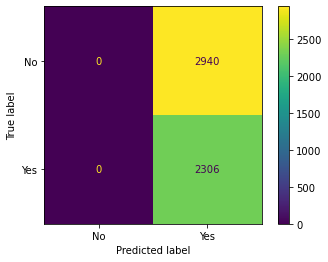

In [62]:
grid_results(logreg_grid2_best)

#### Logistic Regression with GridSearch 3

In [63]:
# # Creating parameters for GridSearch
# params = {'logreg__class_weight':['balanced'],
#                 'logreg__C': [1, .01, .001],
#                 'logreg__solver': ['saga'],
#                 'logreg__max_iter': [25, 75],
#                 'logreg__penalty': ['l1']}

# # GridSearch with the logistic regression pipeline, parameters above, 5 fold cross validation, and accuracy score
# logreg_grid3 = GridSearchCV(estimator=logreg_pipe, param_grid=params, cv=5, scoring=recall_scorer, n_jobs=3)

# # Fitting the GridSearch
# logreg_grid3.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/logreg_grid3_best.pkl', 'wb') as f:
#     pickle.dump(logreg_grid3.best_estimator_, f)

In [64]:
# Load the pickled model
with open('../pickled_models/logreg_grid3_best.pkl', 'rb') as f:
    logreg_grid3_best = pickle.load(f)

Recall
Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Semester_Credit_Load',
                                                   'CGPA']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Course', 'Gender',
                                                   'Relationship_Status',
                                                   'Family_History',
                                                   'Residence_Type',
                                                   'Chronic_Illness']),
                                                 ('ord',
                                                  OrdinalEncoder(categorie

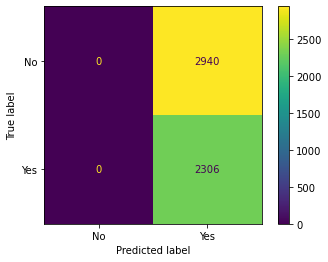

In [65]:
grid_results(logreg_grid3_best)

### Fourth Model: Logistic Regression with Polynomial Features

In [66]:
# # Creating steps for a Pipeline 
# logregpoly_steps = [('preprocess', preprocessor),
#                 ('polynomials', PolynomialFeatures()),
#                 ('logreg', LogisticRegression(max_iter=1000, random_state=333))]

# # Feeding the Pipeline the steps defined above
# logregpoly_pipe = Pipeline(logregpoly_steps)

# # Fitting the training data to the Pipeline
# logregpoly_pipe.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/logregpoly_pipe.pkl', 'wb') as f:
#     pickle.dump(logregpoly_pipe, f)

In [67]:
# Load the pickled model
with open('../pickled_models/logregpoly_pipe.pkl', 'rb') as f:
    logregpoly_pipe = pickle.load(f)

Train Recall:  0.4241110147441457
CV Recall:  0.37944521133241305

Train Accuracy:  0.6471597407548608
CV Accuracy:  0.5810113940714512


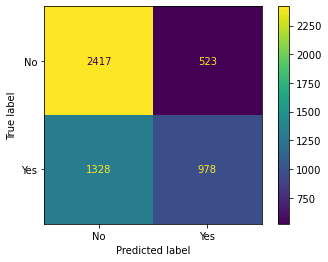

In [68]:
cv_scores(logregpoly_pipe)

#### Logistic Regression with Polynomial Features with Grid Search 1

In [69]:
# # Creating parameters for GridSearch
# params = {'logreg__class_weight':['balanced', None],
#                 'logreg__C': [1, .01, .001],
#                 'logreg__solver': ['saga'],
#                 'logreg__max_iter': [1000, 2000],
#                 'logreg__penalty': ['l1', 'l2']}

# # GridSearch with the logistic regression pipeline, parameters above, 5 fold cross validation, and accuracy score
# logregpoly_grid1 = GridSearchCV(estimator=logregpoly_pipe, param_grid=params, cv=5, scoring=recall_scorer, n_jobs=3)

# # Fitting the GridSearch
# logregpoly_grid1.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/logregpoly_grid1_best.pkl', 'wb') as f:
#     pickle.dump(logregpoly_grid1.best_estimator_, f)

In [70]:
# Load the pickled model
with open('../pickled_models/logregpoly_grid1_best.pkl', 'rb') as f:
    logregpoly_grid1_best = pickle.load(f)

Recall
Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Semester_Credit_Load',
                                                   'CGPA']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Course', 'Gender',
                                                   'Relationship_Status',
                                                   'Family_History',
                                                   'Residence_Type',
                                                   'Chronic_Illness']),
                                                 ('ord',
                                                  OrdinalEncoder(categorie

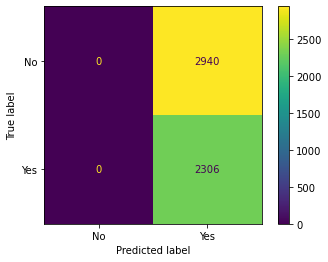

In [71]:
grid_results(logregpoly_grid1_best)

# ROC ATTEMPT

In [72]:
predictions = logregpoly_grid1.best_estimator_.predict_proba(X_train)
predictions
y_pred = np.where(predictions[:,1] > 0.4, 'Yes', 'No')
y_pred

array(['Yes', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'Yes'], dtype='<U3')

In [73]:
print('Recall: ',recall_score(y_train, y_pred, pos_label='Yes'))
print('Accuracy: ',accuracy_score(y_train, y_pred))

Recall:  1.0
Accuracy:  0.4395730080060999


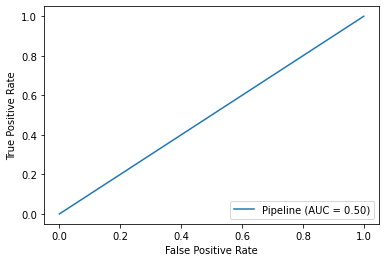

In [74]:
plot_roc_curve(logregpoly_grid1.best_estimator_, X_train, y_train)

#### Logistic Regression with Polynomial Features with Grid Search 2

In [75]:
# # Creating parameters for GridSearch
# params = {'logreg__class_weight':['balanced'],
#                 'logreg__C': [.001, .0001],
#                 'logreg__solver': ['saga', 'sag', 'lbfjs'],
#                 'logreg__max_iter': [600, 800, 1000],
#                 'logreg__penalty': ['l1', 'none'],
#          'polynomials__degree': [2]}

# # GridSearch with the logistic regression pipeline, parameters above, 5 fold cross validation, and accuracy score
# logregpoly_grid2 = GridSearchCV(estimator=logregpoly_pipe, param_grid=params, cv=5, scoring=recall_scorer, n_jobs=3)

# # Fitting the GridSearch
# logregpoly_grid2.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/logregpoly_grid2_best.pkl', 'wb') as f:
#     pickle.dump(logregpoly_grid2.best_estimator_, f)

In [76]:
# Load the pickled model
with open('../pickled_models/logregpoly_grid2_best.pkl', 'rb') as f:
    logregpoly_grid2_best = pickle.load(f)

Recall
Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Semester_Credit_Load',
                                                   'CGPA']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Course', 'Gender',
                                                   'Relationship_Status',
                                                   'Family_History',
                                                   'Residence_Type',
                                                   'Chronic_Illness']),
                                                 ('ord',
                                                  OrdinalEncoder(categorie

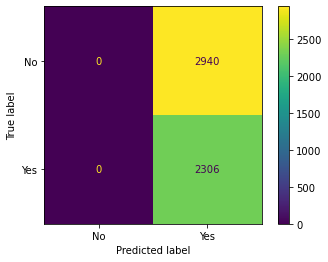

In [77]:
grid_results(logregpoly_grid2_best)

### Fourth Model: Gradient Boosting Classifier

In [78]:
# # Creating steps for a Pipeline 
# gbc_steps = [('preprocess', preprocessor),
#                 ('gbc', GradientBoostingClassifier(random_state=333))]

# # Feeding the Pipeline the steps defined above
# gbc_pipe = Pipeline(gbc_steps)

# # Fitting the training data to the Pipeline
# gbc_pipe.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/gbc_pipe.pkl', 'wb') as f:
#     pickle.dump(gbc_pipe, f)

In [79]:
# Load the pickled model
with open('../pickled_models/gbc_pipe.pkl', 'rb') as f:
    gbc_pipe = pickle.load(f)

Train Recall:  0.30875975715524717
CV Recall:  0.2719027899071283

Train Accuracy:  0.6513534121235227
CV Accuracy:  0.610751645558128


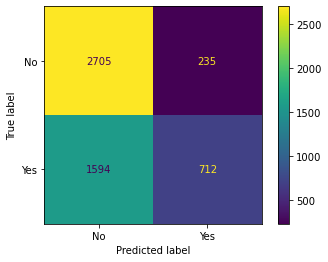

In [80]:
cv_scores(gbc_pipe)

#### Gradient Boosting Classifier with Grid Search 1

In [82]:
# # Creating parameters for GridSearch
# params = {'gbc__loss': ['exponential'],
#           'gbc__learning_rate': [0.01, .1],
#           'gbc__n_estimators': [1000, 500],
#          'gbc__criterion': ['mse'],
#          'gbc__min_samples_split': [2],
#          'gbc__max_depth': [3, None]}

# # GridSearch with the logistic regression pipeline, parameters above, 5 fold cross validation, and accuracy score
# gbc_grid1 = GridSearchCV(estimator=gbc_pipe, param_grid=params, cv=5, scoring=recall_scorer, n_jobs=3)

# # Fitting the GridSearch
# gbc_grid1.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/gbc_grid1_best.pkl', 'wb') as f:
#     pickle.dump(gbc_grid1.best_estimator_, f)
    
# # GradientBoostingClassifier()

In [83]:
# Load the pickled model
with open('../pickled_models/gbc_grid1_best.pkl', 'rb') as f:
    gbc_grid1_best = pickle.load(f)

Recall
Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Semester_Credit_Load',
                                                   'CGPA']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Course', 'Gender',
                                                   'Relationship_Status',
                                                   'Family_History',
                                                   'Residence_Type',
                                                   'Chronic_Illness']),
                                                 ('ord',
                                                  OrdinalEncoder(categorie

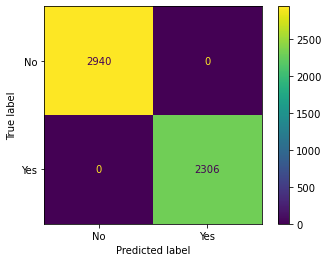

In [84]:
grid_results(gbc_grid1_best)

#### Gradient Boosting Classifier with Grid Search 2

In [85]:
# # Creating parameters for GridSearch
# params = {'gbc__loss': ['exponential'],
#           'gbc__learning_rate': [.1],
#           'gbc__n_estimators': [1000, 1200],
#          'gbc__criterion': ['mse'],
#           'gbc__max_depth': [10, None]}

# # GridSearch with the logistic regression pipeline, parameters above, 5 fold cross validation, and accuracy score
# gbc_grid2 = GridSearchCV(estimator=gbc_pipe, param_grid=params, cv=5, scoring=recall_scorer, n_jobs=3)

# # Fitting the GridSearch
# gbc_grid2.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/gbc_grid2_best.pkl', 'wb') as f:
#     pickle.dump(gbc_grid2.best_estimator_, f)

In [86]:
# Load the pickled model
with open('../pickled_models/gbc_grid2_best.pkl', 'rb') as f:
    gbc_grid2_best = pickle.load(f)

Recall
Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Semester_Credit_Load',
                                                   'CGPA']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Course', 'Gender',
                                                   'Relationship_Status',
                                                   'Family_History',
                                                   'Residence_Type',
                                                   'Chronic_Illness']),
                                                 ('ord',
                                                  OrdinalEncoder(categorie

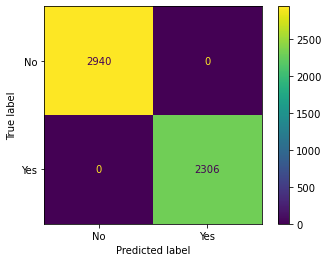

In [87]:
grid_results(gbc_grid2_best)

#### Gradient Boosting Classifier with Gradient Search 3

In [88]:
# # Creating parameters for GridSearch
# params = {'gbc__loss': ['exponential'],
#           'gbc__learning_rate': [.1],
#           'gbc__n_estimators': [300],
#          'gbc__criterion': ['mse'],
#           'gbc__max_depth': [100, 50]}

# # GridSearch with the logistic regression pipeline, parameters above, 5 fold cross validation, and accuracy score
# gbc_grid3 = GridSearchCV(estimator=gbc_pipe, param_grid=params, cv=5, scoring=recall_scorer, n_jobs=3)

# # Fitting the GridSearch
# gbc_grid3.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/gbc_grid3_best.pkl', 'wb') as f:
#     pickle.dump(gbc_grid3.best_estimator_, f)

In [89]:
# Load the pickled model
with open('../pickled_models/gbc_grid3_best.pkl', 'rb') as f:
    gbc_grid3_best = pickle.load(f)

Recall
Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Semester_Credit_Load',
                                                   'CGPA']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Course', 'Gender',
                                                   'Relationship_Status',
                                                   'Family_History',
                                                   'Residence_Type',
                                                   'Chronic_Illness']),
                                                 ('ord',
                                                  OrdinalEncoder(categorie

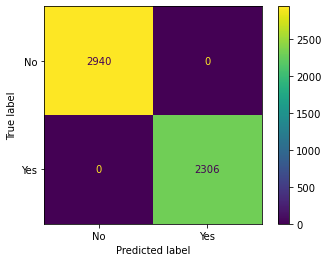

In [90]:
grid_results(gbc_grid3_best)

### Curiosity: Neural Network

In [91]:
# # Creating steps for a Pipeline 
# neural_steps = [('preprocess', preprocessor),
#                 ('neural', MLPClassifier(random_state=333, max_iter=1000))]

# # Feeding the Pipeline the steps defined above
# neural_pipe = Pipeline(neural_steps)

# # Fitting the training data to the Pipeline
# neural_pipe.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/neural_pipe.pkl', 'wb') as f:
#     pickle.dump(neural_pipe, f)

In [92]:
# Load the pickled model
with open('../pickled_models/neural_pipe.pkl', 'rb') as f:
    neural_pipe = pickle.load(f)

Train Recall:  0.8074588031222897
CV Recall:  0.47096468246142864

Train Accuracy:  0.8518871521158978
CV Accuracy:  0.529932543465432


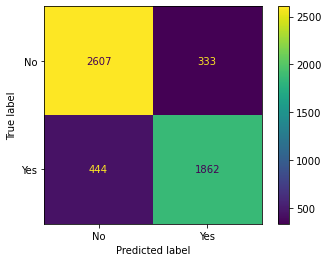

In [93]:
cv_scores(neural_pipe)

### Neural Network with Polynomials

In [94]:
# # Creating steps for a Pipeline 
# neural_steps = [('preprocess', preprocessor),
#                 ('polynomialfeatures', PolynomialFeatures()),
#                 ('neural', MLPClassifier(random_state=333, max_iter=2000))]

# # Feeding the Pipeline the steps defined above
# neuralpoly_pipe = Pipeline(neural_steps)

# # Fitting the training data to the Pipeline
# neuralpoly_pipe.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/neuralpoly_pipe.pkl', 'wb') as f:
#     pickle.dump(neuralpoly_pipe, f)

In [95]:
# Load the pickled model
with open('../pickled_models/neuralpoly_pipe.pkl', 'rb') as f:
    neuralpoly_pipe = pickle.load(f)

Train Recall:  1.0
CV Recall:  0.4423218863565935

Train Accuracy:  1.0
CV Accuracy:  0.5373618412093151


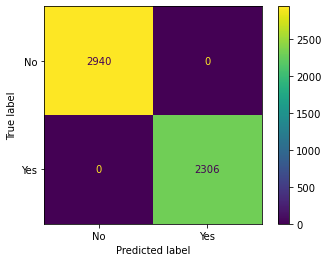

In [96]:
cv_scores(neuralpoly_pipe)

#### Neural Network with Random Search 1

In [97]:
# # Creating parameters for RandomizedSearch
# params = {'neural__hidden_layer_sizes': [(100,), (50,), (150,), (500,)],
#          'neural__activation': ['relu', 'identity', 'logistic', 'tanh'],
#          'neural__solver': ['lbfgs', 'sgd', 'adam'],
#          'neural__alpha': [0.0001, 0.1, 0.001],
#          'neural__learning_rate': ['constant', 'invscaling', 'adaptive']}

# # GridSearch with the logistic regression pipeline, parameters above, 5 fold cross validation, and accuracy score
# neuralpoly_random1 = RandomizedSearchCV(estimator=neuralpoly_pipe, param_distributions=params, cv=5, scoring=recall_scorer, n_iter=50, n_jobs=3, random_state=333)

# # Fitting the GridSearch
# neuralpoly_random1.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/neuralpoly_random1_best.pkl', 'wb') as f:
#     pickle.dump(neuralpoly_random1.best_estimator_, f)

In [98]:
# Load the pickled model
with open('../pickled_models/neuralpoly_random1_best.pkl', 'rb') as f:
    neuralpoly_random1_best = pickle.load(f)

Train Recall:  0.9986990459670425
CV Recall:  0.4735573898263703

Train Accuracy:  0.9992375142966069
CV Accuracy:  0.5322191656452858


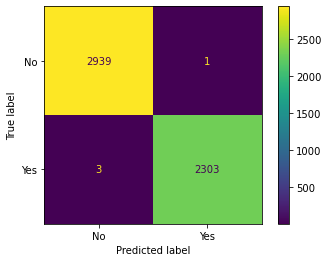

In [99]:
cv_scores(neuralpoly_random1.best_estimator_)

In [100]:
neuralpoly_random1.best_params_

{'neural__solver': 'lbfgs',
 'neural__learning_rate': 'invscaling',
 'neural__hidden_layer_sizes': (100,),
 'neural__alpha': 0.0001,
 'neural__activation': 'logistic'}

#### Neural Network with Grid Search 1

In [101]:
# # Creating parameters for RandomizedSearch
# params = {'neural__hidden_layer_sizes': [(75,), (100,), (125,)],
#          'neural__activation': ['logistic'],
#          'neural__solver': ['lbfgs'],
#          'neural__alpha': [0.0001, 0.00001, 0.000001],
#          'neural__learning_rate': ['invscaling']}

# # GridSearch
# neuralpoly_grid1 = GridSearchCV(estimator=neuralpoly_pipe, param_grid=params, cv=5, scoring=recall_scorer, n_jobs=3)

# # Fitting the GridSearch
# neuralpoly_grid1.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/neuralpoly_grid1_best.pkl', 'wb') as f:
#     pickle.dump(neuralpoly_grid1.best_estimator_, f)

In [102]:
# Load the pickled model
with open('../pickled_models/neuralpoly_grid1_best.pkl', 'rb') as f:
    neuralpoly_grid1_best = pickle.load(f)

Recall
Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Semester_Credit_Load',
                                                   'CGPA']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Course', 'Gender',
                                                   'Relationship_Status',
                                                   'Family_History',
                                                   'Residence_Type',
                                                   'Chronic_Illness']),
                                                 ('ord',
                                                  OrdinalEncoder(categorie

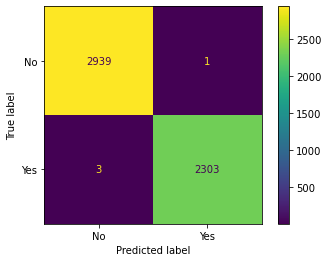

In [103]:
grid_results(neuralpoly_grid1_best)

### XGBoost

In [104]:
# # Creating steps for a Pipeline 
# xgb_steps = [('preprocess', preprocessor),
#                 ('xgb', xgb.XGBClassifier(random_state=333))]

# # Feeding the Pipeline the steps defined above
# xgb_pipe = Pipeline(xgb_steps)

# # Fitting the training data to the Pipeline
# xgb_pipe.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/xgb_pipe.pkl', 'wb') as f:
#     pickle.dump(xgb_pipe, f)

In [105]:
# Load the pickled model
with open('../pickled_models/xgb_pipe.pkl', 'rb') as f:
    xgb_pipe = pickle.load(f)

In [106]:
# Load the pickled model
with open('../pickled_models/xgb_pipe.pkl', 'rb') as f:
    xgb_pipe = pickle.load(f)

Train Recall:  0.9449262792714658
CV Recall:  0.41587364190401066

Train Accuracy:  0.9717880289744567
CV Accuracy:  0.5514687003495392


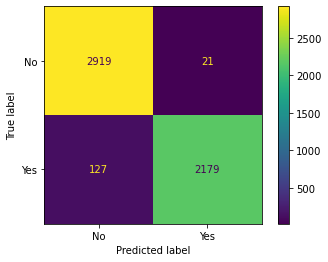

In [107]:
cv_scores(xgb_pipe)

#### XGBoost with Random Search 1

In [108]:
# # Creating parameters for RandomizedSearch
# params = {
#     'xgb__learning_rate': [0.1, 0.05, 0.01],
#     'xgb__n_estimators': [100, 200, 300],
#     'xgb__max_depth': [3, 5, 7],
#     'xgb__min_child_weight': [1, 3, 5],
#     'xgb__gamma': [0, 0.1, 0.2]
# }

# # GridSearch
# xgb_random1 = RandomizedSearchCV(estimator=xgb_pipe, param_distributions=params, cv=5, scoring=recall_scorer, n_jobs=3, random_state=333, n_iter=50)

# # Fitting the GridSearch
# xgb_random1.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/xgb_random1_best.pkl', 'wb') as f:
#     pickle.dump(xgb_random1.best_estimator_, f)

In [109]:
# Load the pickled model
with open('../pickled_models/xgb_random1_best.pkl', 'rb') as f:
    xgb_random1.best_estimator_ = pickle.load(f)

Recall
Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Semester_Credit_Load',
                                                   'CGPA']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Course', 'Gender',
                                                   'Relationship_Status',
                                                   'Family_History',
                                                   'Residence_Type',
                                                   'Chronic_Illness']),
                                                 ('ord',
                                                  OrdinalEncoder(categorie

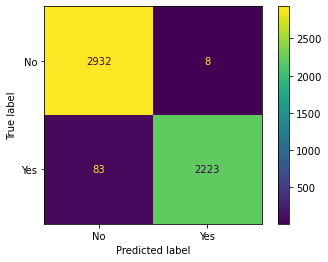

In [110]:
grid_results(xgb_random1.best_estimator_)

#### XGBoost with Grid Search 1

Tried to improve results with tailored Grid Search.

In [111]:
# # Creating parameters for RandomizedSearch
# params = {
#     'xgb__learning_rate': [0.1, 0.5],
#     'xgb__n_estimators': [300, 700],
#     'xgb__max_depth': [7, 15, 20],
#     'xgb__min_child_weight': [2, 3, 4],
#     'xgb__gamma': [0.1]
# }

# # GridSearch
# xgb_grid1 = GridSearchCV(estimator=xgb_pipe, param_grid=params, cv=5, scoring=recall_scorer, n_jobs=3)

# # Fitting the GridSearch
# xgb_grid1.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/xgb_grid1_best.pkl', 'wb') as f:
#     pickle.dump(xgb_grid1.best_estimator_, f)

In [112]:
# Load the pickled model
with open('../pickled_models/xgb_grid1_best.pkl', 'rb') as f:
    xgb_grid1_best = pickle.load(f)

Recall
Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Semester_Credit_Load',
                                                   'CGPA']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Course', 'Gender',
                                                   'Relationship_Status',
                                                   'Family_History',
                                                   'Residence_Type',
                                                   'Chronic_Illness']),
                                                 ('ord',
                                                  OrdinalEncoder(categorie

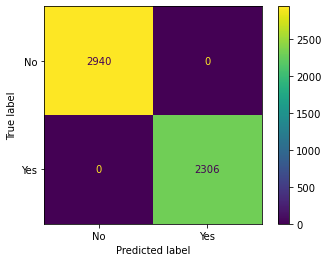

In [113]:
grid_results(xgb_grid1_best)

### Stacking Classifier

In [114]:
# # Stacking Classifier
# estimators = [('logreg',LogisticRegression(C=0.001, class_weight='balanced', max_iter=25, penalty='l1', solver='saga')), 
#               ('forest',RandomForestClassifier(criterion='gini', max_depth=30, max_features=None, max_leaf_nodes=1000, min_impurity_decrease=0,
#                                     min_samples_split=4, min_weight_fraction_leaf=0, n_estimators=40, random_state=333)), 
#               ('xgb', xgb.XGBClassifier(gamma=0.1, learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=300))]

# # Creating steps for a Pipeline
# sc_steps = [('preprocessing', preprocessor),
#             ('sc', StackingClassifier(estimators=estimators, cv=5, n_jobs=3, final_estimator=RandomForestClassifier(n_estimators=700, max_depth=20, random_state=333)))]

# # Feeding the Pipeline the steps defined above
# sc_pipe = Pipeline(sc_steps)

# # Fitting the training data to the Pipeline
# sc_pipe.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/sc_pipe.pkl', 'wb') as f:
#     pickle.dump(sc_pipe, f)

In [115]:
# Load the pickled model
with open('../pickled_models/sc_pipe.pkl', 'rb') as f:
    sc_pipe = pickle.load(f)

Train Recall:  0.7632263660017347
CV Recall:  0.40068268679982344

Train Accuracy:  0.7476172321768967
CV Accuracy:  0.5541379091197965


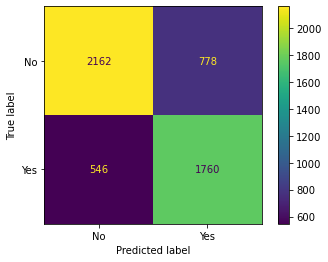

In [116]:
cv_scores(sc_pipe)

#### Stacking Classifier Default Parameters

In [117]:
# # Stacking Classifier
# estimators = [('logreg',LogisticRegression()), 
#               ('forest',RandomForestClassifier(random_state=333)), 
#               ('xgb', xgb.XGBClassifier())]

# # Creating steps for a Pipeline
# sc_steps = [('preprocessing', preprocessor),
#             ('sc', StackingClassifier(estimators=estimators, cv=5, n_jobs=3, final_estimator=RandomForestClassifier(random_state=333)))]

# # Feeding the Pipeline the steps defined above
# sc_pipe = Pipeline(sc_steps)

# # Fitting the training data to the Pipeline
# sc_pipe.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/sc_pipe_default.pkl', 'wb') as f:
#     pickle.dump(sc_pipe, f)

In [118]:
# Load the pickled model
with open('../pickled_models/sc_pipe_default.pkl', 'rb') as f:
    sc_pipe_default = pickle.load(f)

Train Recall:  0.2059843885516045
CV Recall:  0.4067695861622109

Train Accuracy:  0.2651544033549371
CV Accuracy:  0.5623347405692496


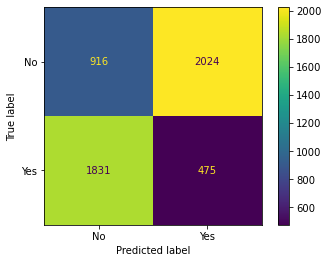

In [119]:
cv_scores(sc_pipe_default)

#### Stacking Classifier with Polynomials 1

In [120]:
# # Stacking Classifier
# estimators = [('logreg',LogisticRegression()), 
#               ('forest',RandomForestClassifier(random_state=333)), 
#               ('xgb', xgb.XGBClassifier())]

# # Creating steps for a Pipeline
# sc_steps = [('preprocessing', preprocessor),
#             ('polynomials', PolynomialFeatures()),
#             ('sc', StackingClassifier(estimators=estimators, cv=5, n_jobs=3))]

# # Feeding the Pipeline the steps defined above
# sc_pipepoly1 = Pipeline(sc_steps)

# # Fitting the training data to the Pipeline
# sc_pipepoly1.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/sc_pipepoly1.pkl', 'wb') as f:
#     pickle.dump(sc_pipepoly1, f)

In [122]:
# Load the pickled model
with open('../pickled_models/sc_pipepoly1.pkl', 'rb') as f:
    sc_pipepoly1 = pickle.load(f)

Train Recall:  0.9991326973113617
CV Recall:  0.2549877454432769

Train Accuracy:  0.9996187571483035
CV Accuracy:  0.6109423033274319


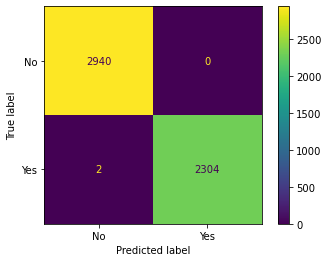

In [123]:
cv_scores(sc_pipepoly1)

#### Stacking Classifiers with Polynomials 2

In [124]:
# # Stacking Classifier
# estimators = [('logreg',LogisticRegression(C=0.001, class_weight='balanced', max_iter=800, penalty='l1', solver='saga')), 
#               ('forest',RandomForestClassifier(random_state=333)), 
#               ('xgb', xgb.XGBClassifier())]

# # Creating steps for a Pipeline
# sc_steps = [('preprocessing', preprocessor),
#             ('polynomials', PolynomialFeatures()),
#             ('sc', StackingClassifier(estimators=estimators, cv=5, n_jobs=3, final_estimator=RandomForestClassifier(random_state=333)))]

# # Feeding the Pipeline the steps defined above
# sc_pipepoly2 = Pipeline(sc_steps)

# # Fitting the training data to the Pipeline
# sc_pipepoly2.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/sc_pipepoly2.pkl', 'wb') as f:
#     pickle.dump(sc_pipepoly2, f)

In [125]:
# Load the pickled model
with open('../pickled_models/sc_pipepoly2.pkl', 'rb') as f:
    sc_pipepoly2 = pickle.load(f)

Train Recall:  0.8620988725065047
CV Recall:  0.44534937224741994

Train Accuracy:  0.8999237514296607
CV Accuracy:  0.5480357710290981


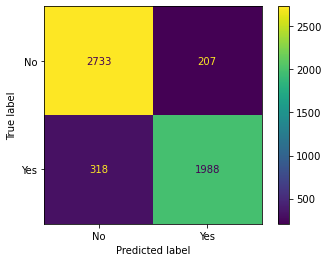

In [126]:
cv_scores(sc_pipepoly2)

#### Stacking Classifiers with Polynomials 3

In [127]:
# # Stacking Classifier
# estimators = [('logreg',LogisticRegression(C=0.001, class_weight='balanced', max_iter=800, penalty='l1', solver='saga')), 
#               ('forest',RandomForestClassifier(random_state=333)), 
#               ('xgb', xgb.XGBClassifier())]

# # Creating steps for a Pipeline
# sc_steps = [('preprocessing', preprocessor),
#             ('polynomials', PolynomialFeatures()),
#             ('sc', StackingClassifier(estimators=estimators, cv=5, n_jobs=3, final_estimator=xgb.XGBClassifier()))]

# # Feeding the Pipeline the steps defined above
# sc_pipepoly3 = Pipeline(sc_steps)

# # Fitting the training data to the Pipeline
# sc_pipepoly3.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/sc_pipepoly3.pkl', 'wb') as f:
#     pickle.dump(sc_pipepoly3, f)

In [128]:
# Load the pickled model
with open('../pickled_models/sc_pipepoly3.pkl', 'rb') as f:
    sc_pipepoly3 = pickle.load(f)

Train Recall:  0.8876843018213356
CV Recall:  0.3659755284484135

Train Accuracy:  0.8808616088448341
CV Accuracy:  0.5590946479640474


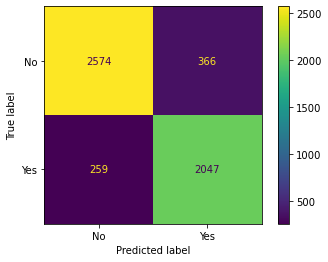

In [129]:
cv_scores(sc_pipepoly3)

#### Stacking Classifiers with Polynomials 4

In [130]:
# # Creating parameters for RandomizedSearch
# params = {
#     'sc__xgb__learning_rate': [0.001, 0.1],
#     'sc__xgb__n_estimators': [300, 700],
#     'sc__xgb__max_depth': [7, 15, 20],
#     'sc__forest__n_estimators': [100, 300],
#     'sc__forest__max_depth': [None, 30]
# }

# # xgb.XGBClassifier()
# # LogisticRegressionisticRegression()
# # RandomForestClassifier()

# # GridSearch
# sc_grid1 = GridSearchCV(estimator=sc_pipepoly3, param_grid=params, cv=5, scoring=recall_scorer, n_jobs=3)

# # Fitting the GridSearch
# sc_grid1.fit(X_train, y_train)

# # Pickle the model
# with open('../pickled_models/sc_grid1_best.pkl', 'wb') as f:
#     pickle.dump(sc_grid1.best_estimator_, f)

In [132]:
# Load the pickled model
with open('../pickled_models/sc_grid1_best.pkl', 'rb') as f:
    sc_grid1_best = pickle.load(f)

Recall
Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Semester_Credit_Load',
                                                   'CGPA']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Course', 'Gender',
                                                   'Relationship_Status',
                                                   'Family_History',
                                                   'Residence_Type',
                                                   'Chronic_Illness']),
                                                 ('ord',
                                                  OrdinalEncoder(catego

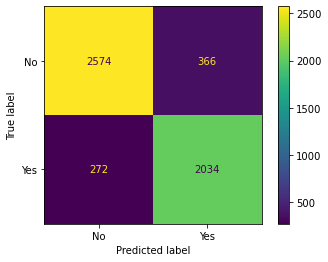

In [134]:
grid_results(sc_grid1_best)

Monday:
Add SVC to either Logregpoly2 or sc_grid1, whichever is better. Maybe add to neural network or XGBoost